[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/CompOmics/D012554A_2025/blob/main/notebooks/day_1/answers/1.2b_Exercises_Non-linear_regression_answers.ipynb)

# 1.2 Exercises – Non-linear Regression (Answers)

In this notebook you will practice the non-linear regression techniques from the lecture using a new dataset.

## Dataset: Diamond Prices

We will use the [diamonds dataset](https://ggplot2.tidyverse.org/reference/diamonds.html), which contains prices and attributes of ~54,000 diamonds. For efficiency we work with a random sample of 500 diamonds.

| Feature | Description |
|---------|-------------|
| `carat` | Weight of the diamond (0.2–5.01) |
| `price` | Price in US dollars ($326–$18,823) |

The relationship between `carat` and `price` is clearly non-linear — larger diamonds are disproportionately more expensive.

Goal: Use polynomial regression and other non-linear techniques to model diamond prices.

In [12]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context("notebook", font_scale=1.2)
sns.set_style("whitegrid")

## Exercise 1 – Load and explore the dataset

Load the diamonds dataset from the URL below and take a random sample of 500 rows (use `random_state=42`). Keep only the `carat` and `price` columns.

Display the shape, basic statistics (`.describe()`), and the first 5 rows.

```python
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv"
```

In [13]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv"

diamonds = pd.read_csv(url)
dataset = diamonds[['carat', 'price']].sample(n=500, random_state=42).reset_index(drop=True)

print(f"Dataset shape: {dataset.shape}")
print(f"\nBasic statistics:")
print(dataset.describe())
print(f"\nFirst 5 rows:")
dataset.head()

Dataset shape: (500, 2)

Basic statistics:
            carat         price
count  500.000000    500.000000
mean     0.834520   4243.838000
std      0.504862   4321.650221
min      0.230000    373.000000
25%      0.400000    955.250000
50%      0.720000   2665.000000
75%      1.090000   5508.500000
max      2.750000  18803.000000

First 5 rows:


,carat,price
0,0.24,559
1,0.58,2201
2,0.40,1238
3,0.43,1304
4,1.55,6901


## Exercise 2 – Visualize the relationship

Create a scatter plot of `carat` (x-axis) versus `price` (y-axis) using `sns.lmplot` with `fit_reg=False`.

Does the relationship look linear?

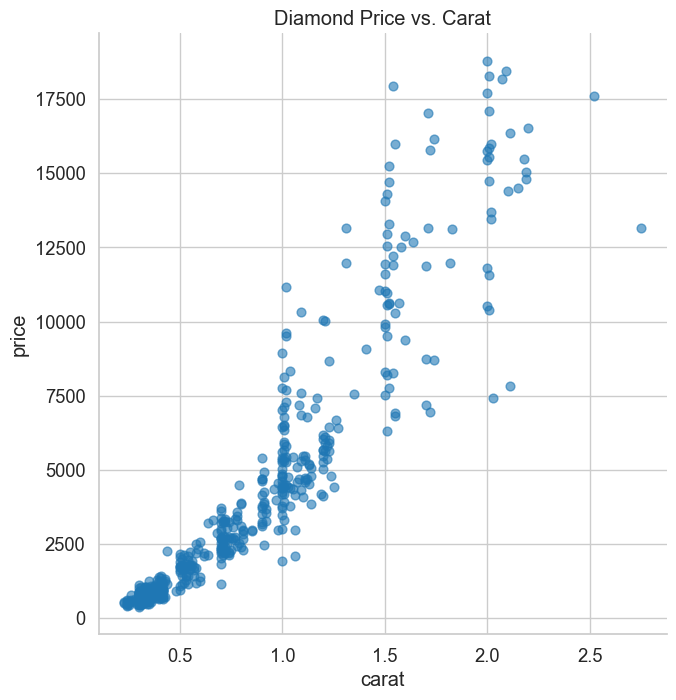

In [14]:
sns.lmplot(x="carat", y="price", data=dataset,
           fit_reg=False, height=7, scatter_kws={"s": 40, "alpha": 0.6})
plt.title("Diamond Price vs. Carat")
plt.show()

## Exercise 3 – Fit a linear model

Fit a `LinearRegression` model using `carat` as the single feature to predict `price`.

1. Compute and print the R² score.
2. Plot the data points and overlay the linear fit line.

Hint: Use `np.linspace` to generate evenly spaced x-values for plotting the line.

R-squared (linear) = 0.8593


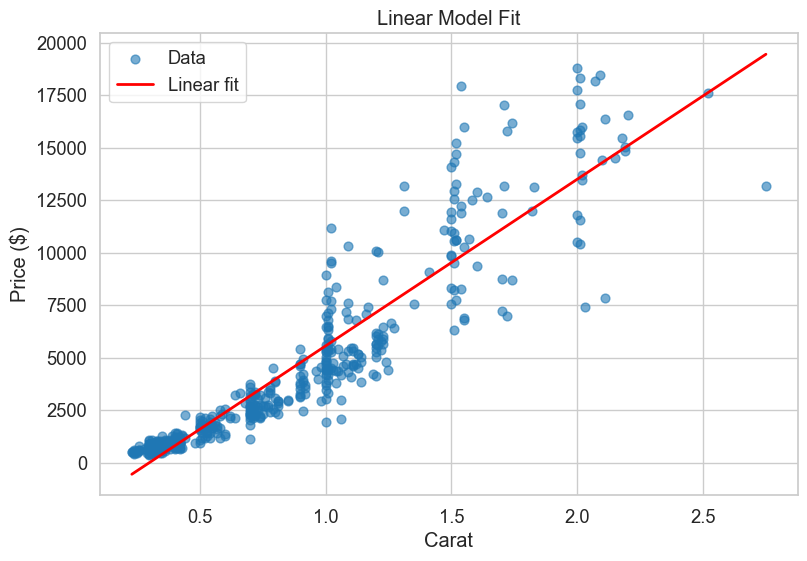

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = dataset[['carat']].values
y = dataset['price'].values

model_linear = LinearRegression(fit_intercept=True)
model_linear.fit(X, y)
y_pred_linear = model_linear.predict(X)

print(f"R-squared (linear) = {r2_score(y, y_pred_linear):.4f}")

plt.figure(figsize=(9, 6))
plt.scatter(dataset['carat'], y, s=40, alpha=0.6, label='Data')
x_plot = np.linspace(dataset['carat'].min(), dataset['carat'].max(), 100)
plt.plot(x_plot, model_linear.predict(x_plot.reshape(-1, 1)),
         'r-', linewidth=2, label='Linear fit')
plt.xlabel('Carat')
plt.ylabel('Price ($)')
plt.title('Linear Model Fit')
plt.legend()
plt.show()

## Exercise 4 – Evaluate the linear model

Is the linear model a good fit for this data? Why or why not? Write your answer below.

The linear model captures the general upward trend but is not a good fit. The scatter plot shows a clear curved / non-linear relationship: price increases slowly for small carats but accelerates for larger carats. The linear model under-predicts for very small and very large diamonds and over-predicts in the middle range. The R², while reasonable, can be improved significantly with non-linear approaches.

## Exercise 5 – Polynomial model (degree 2)

Add a new feature `carat^2` (the square of `carat`) to the dataset. Fit a `LinearRegression` model using both `carat` and `carat^2` as features.

1. Print the R² score and compare it to the linear model.
2. Plot the data and overlay the degree-2 polynomial curve.

Hint: To plot the curve, compute predictions as:

$$\hat{y} = \theta_0 + \theta_1 \cdot x + \theta_2 \cdot x^2$$

where the coefficients come from `model.intercept_` and `model.coef_`.

R-squared (degree 2) = 0.8642


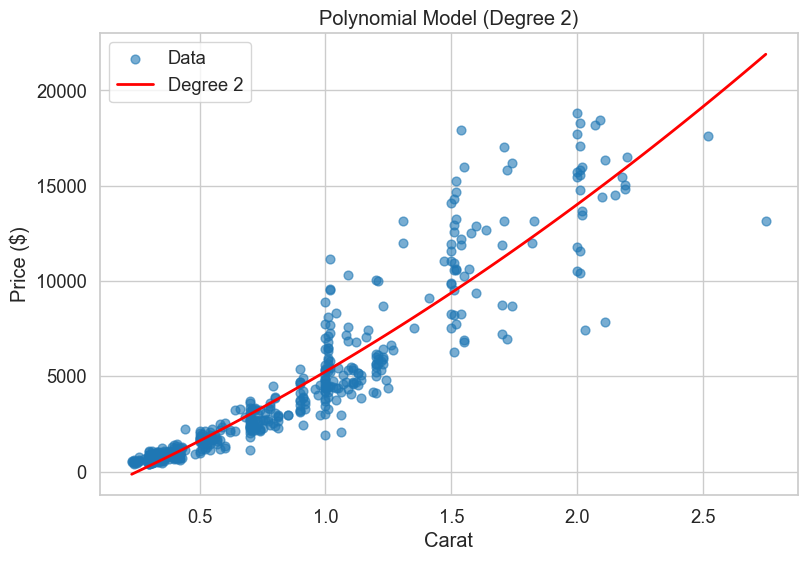

In [16]:
dataset['carat^2'] = dataset['carat'] ** 2

X_poly2 = dataset[['carat', 'carat^2']].values

model_poly2 = LinearRegression(fit_intercept=True)
model_poly2.fit(X_poly2, y)
y_pred_poly2 = model_poly2.predict(X_poly2)

print(f"R-squared (degree 2) = {r2_score(y, y_pred_poly2):.4f}")

plt.figure(figsize=(9, 6))
plt.scatter(dataset['carat'], y, s=40, alpha=0.6, label='Data')
x_plot = np.linspace(dataset['carat'].min(), dataset['carat'].max(), 100)
pred_plot = (model_poly2.intercept_
             + model_poly2.coef_[0] * x_plot
             + model_poly2.coef_[1] * x_plot**2)
plt.plot(x_plot, pred_plot, 'r-', linewidth=2, label='Degree 2')
plt.xlabel('Carat')
plt.ylabel('Price ($)')
plt.title('Polynomial Model (Degree 2)')
plt.legend()
plt.show()

## Exercise 6 – Higher-degree polynomials with scaling

Fit polynomial models of degrees 2 through 7 and plot all fits on a single figure.

Important: Higher-degree polynomial features (e.g. `carat^7`) can have very large values. Use `MinMaxScaler` to scale each polynomial feature to the [0, 1] range before fitting.

Steps:
1. Loop over degrees 2 to 7.
2. For each degree, build a feature matrix with columns `carat`, `carat^2`, ..., `carat^d`.
3. Scale the polynomial features (degree ≥ 2) using `MinMaxScaler`.
4. Fit a `LinearRegression` and store the R² score.
5. Generate predictions for plotting (remember to scale the plot features with the same scaler).
6. Show all polynomial fits on one scatter plot with a legend that includes the R².

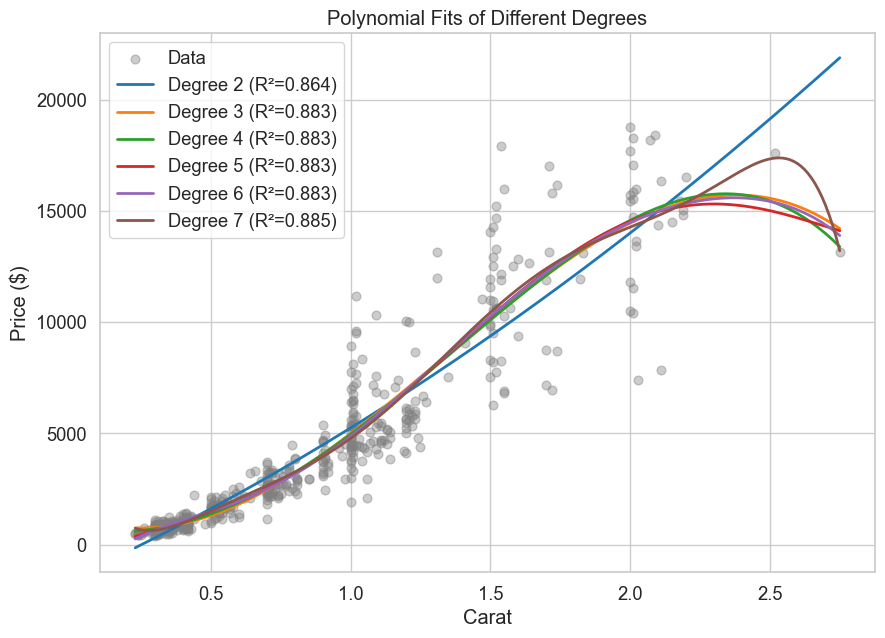

In [17]:
from sklearn.preprocessing import MinMaxScaler

plt.figure(figsize=(10, 7))
plt.scatter(dataset['carat'], y, s=40, alpha=0.4, label='Data', color='grey')

x_plot = np.linspace(dataset['carat'].min(), dataset['carat'].max(), 200)

for degree in [2, 3, 4, 5, 6, 7]:
    # Build feature matrices
    X_train = pd.DataFrame({'carat': dataset['carat']})
    X_pred = pd.DataFrame({'carat': x_plot})

    for d in range(2, degree + 1):
        X_train[f'carat^{d}'] = dataset['carat'] ** d
        X_pred[f'carat^{d}'] = x_plot ** d

    # Scale polynomial features
    poly_cols = [f'carat^{d}' for d in range(2, degree + 1)]
    scaler = MinMaxScaler()
    X_train[poly_cols] = scaler.fit_transform(X_train[poly_cols])
    X_pred[poly_cols] = scaler.transform(X_pred[poly_cols])

    # Fit and predict
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train, y)
    r2 = r2_score(y, model.predict(X_train))

    pred = model.predict(X_pred)
    plt.plot(x_plot, pred, linewidth=2,
             label=f'Degree {degree} (R\u00b2={r2:.3f})')

plt.xlabel('Carat')
plt.ylabel('Price ($)')
plt.title('Polynomial Fits of Different Degrees')
plt.legend(loc='upper left')
plt.show()

## Exercise 7 – Train/test split: detecting overfitting

Split the data into 80% training and 20% test sets (use `random_state=42`). For each polynomial degree from 2 to 9:

1. Build polynomial features and scale them with `MinMaxScaler`.
2. Fit on the training set.
3. Compute R² on both the training and test sets.

Print a table showing degree, training R², and test R².

Hint: Use `train_test_split` from `sklearn.model_selection`. Make sure to `fit` the scaler on the training data only and `transform` both train and test.

In [18]:
from sklearn.model_selection import train_test_split

X_all = dataset['carat'].values
y_all = dataset['price'].values

X_tr, X_te, y_tr, y_te = train_test_split(
    X_all, y_all, test_size=0.2, random_state=42
)

print(f"{'Degree':<8} {'Train R\u00b2':<12} {'Test R\u00b2':<12}")
print("-" * 32)

for degree in range(2, 10):
    # Build polynomial features
    X_train_df = pd.DataFrame({'carat': X_tr})
    X_test_df = pd.DataFrame({'carat': X_te})

    for d in range(2, degree + 1):
        X_train_df[f'carat^{d}'] = X_tr ** d
        X_test_df[f'carat^{d}'] = X_te ** d

    # Scale polynomial features (fit on train only)
    poly_cols = [f'carat^{d}' for d in range(2, degree + 1)]
    scaler = MinMaxScaler()
    X_train_df[poly_cols] = scaler.fit_transform(X_train_df[poly_cols])
    X_test_df[poly_cols] = scaler.transform(X_test_df[poly_cols])

    # Fit and evaluate
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train_df, y_tr)

    r2_train = r2_score(y_tr, model.predict(X_train_df))
    r2_test = r2_score(y_te, model.predict(X_test_df))

    print(f"{degree:<8} {r2_train:<12.4f} {r2_test:<12.4f}")

Degree   Train R²     Test R²     
--------------------------------
2        0.8471       0.9041      
3        0.8659       0.9240      
4        0.8659       0.9245      
5        0.8662       0.9256      
6        0.8667       0.9238      
7        0.8682       0.9250      
8        0.8682       0.9253      
9        0.8684       0.9254      


## Exercise 8 – Interpret the results

Based on the training vs. test R² values:
- Which polynomial degree gives the best test performance?
- At what degree do you start to see signs of overfitting (training R² much higher than test R²)?

Write your answer below.

A relatively low degree (around 3–4) typically gives the best test R². As the degree increases, the training R² keeps rising (the model memorizes the training data better) but the test R² starts declining or becomes unstable. The growing gap between training and test R² is the hallmark of overfitting. This usually becomes visible around degree 6–7 and higher, where the model fits noise in the training data rather than the true underlying pattern.

## Exercise 9 – Using `PolynomialFeatures`

Instead of manually creating polynomial features, use `sklearn.preprocessing.PolynomialFeatures` to automatically generate them.

1. Create degree-3 polynomial features from `carat` (set `include_bias=False`).
2. Fit a `LinearRegression` model on these features.
3. Print the R² score.
4. Compare this result with your manual degree-3 polynomial from Exercise 6.

In [19]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly3 = poly.fit_transform(dataset[['carat']])

print(f"Feature names: {poly.get_feature_names_out()}")
print(f"Shape of transformed features: {X_poly3.shape}")

model_poly3 = LinearRegression(fit_intercept=True)
model_poly3.fit(X_poly3, y)

r2_poly3 = r2_score(y, model_poly3.predict(X_poly3))
print(f"\nR-squared (PolynomialFeatures, degree 3) = {r2_poly3:.4f}")
print("\nThis should match the manual degree-3 result from Exercise 6.")

Feature names: ['carat' 'carat^2' 'carat^3']
Shape of transformed features: (500, 3)

R-squared (PolynomialFeatures, degree 3) = 0.8826

This should match the manual degree-3 result from Exercise 6.


## Exercise 10 – Sigmoid curve fitting

As discussed in the lecture, many biological relationships follow a sigmoid (logistic) function:

$$f(x) = \frac{L}{1 + e^{-\theta_1(x - \theta_0)}}$$

where:
- $L$ is the curve's maximum value
- $\theta_0$ is the x-value of the sigmoid's midpoint
- $\theta_1$ controls the steepness

The cell below provides synthetic dose-response data. Your task:

1. Define a Python function `sigmoid(x, L, theta0, theta1)` implementing the formula above.
2. Fit the parameters using `scipy.optimize.curve_fit`.
3. Plot the data and the fitted sigmoid curve.
4. Print the fitted parameters.

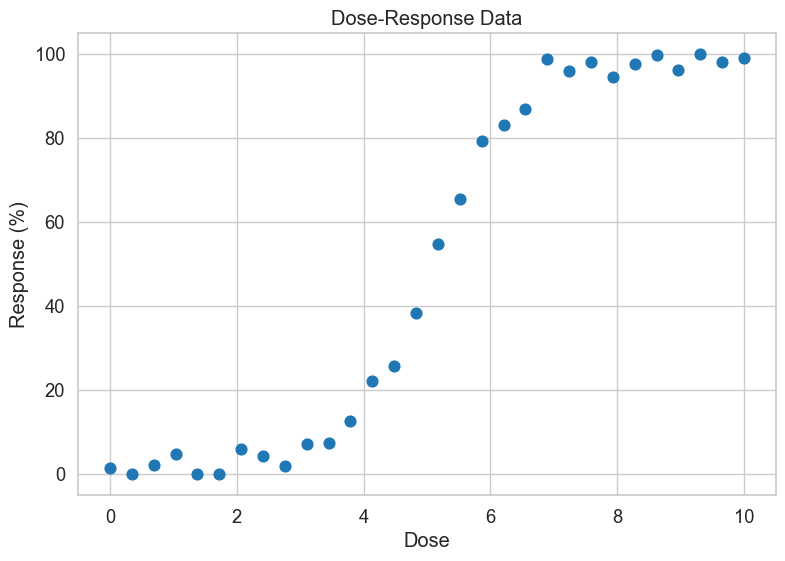

In [20]:
# Synthetic dose-response data (provided)
np.random.seed(42)
dose = np.linspace(0, 10, 30)
response = 100 / (1 + np.exp(-(1.5 * (dose - 5)))) + np.random.normal(0, 3, size=30)
response = np.clip(response, 0, 100)
dose_response = pd.DataFrame({'dose': dose, 'response': response})

plt.figure(figsize=(9, 6))
plt.scatter(dose_response['dose'], dose_response['response'], s=60)
plt.xlabel('Dose')
plt.ylabel('Response (%)')
plt.title('Dose-Response Data')
plt.show()

Fitted parameters:
  L      = 99.01  (maximum response)
  theta0 = 5.06  (midpoint)
  theta1 = 1.53  (steepness)


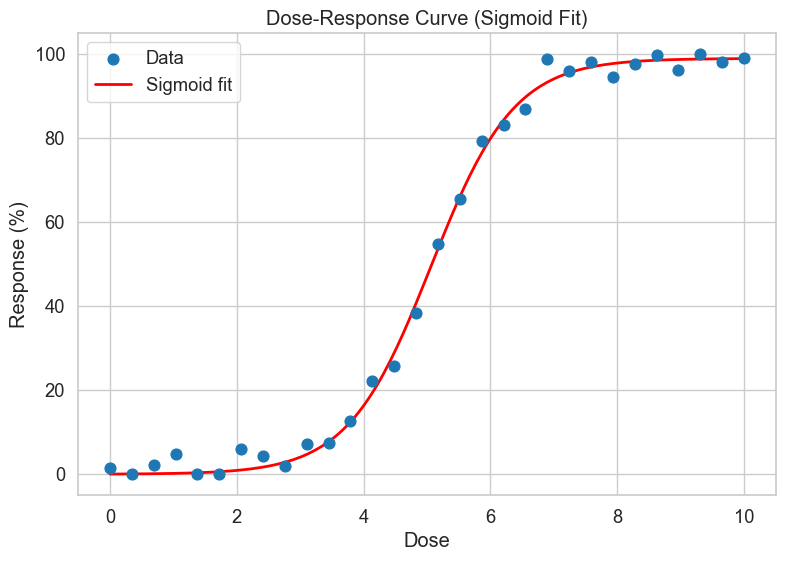

In [21]:
from scipy.optimize import curve_fit

def sigmoid(x, L, theta0, theta1):
    """Sigmoid (logistic) function."""
    return L / (1 + np.exp(-theta1 * (x - theta0)))

# Fit the sigmoid to the dose-response data
popt, pcov = curve_fit(
    sigmoid,
    dose_response['dose'],
    dose_response['response'],
    p0=[100, 5, 1]  # initial guesses: L=100, theta0=5, theta1=1
)

L_fit, theta0_fit, theta1_fit = popt
print(f"Fitted parameters:")
print(f"  L      = {L_fit:.2f}  (maximum response)")
print(f"  theta0 = {theta0_fit:.2f}  (midpoint)")
print(f"  theta1 = {theta1_fit:.2f}  (steepness)")

# Plot
plt.figure(figsize=(9, 6))
plt.scatter(dose_response['dose'], dose_response['response'],
            s=60, label='Data', zorder=5)
x_smooth = np.linspace(0, 10, 200)
plt.plot(x_smooth, sigmoid(x_smooth, *popt),
         'r-', linewidth=2, label=f'Sigmoid fit')
plt.xlabel('Dose')
plt.ylabel('Response (%)')
plt.title('Dose-Response Curve (Sigmoid Fit)')
plt.legend()
plt.show()

## Exercise 11 – Log-transform the target variable

Sometimes a non-linear relationship can be made approximately linear by transforming the target variable.

1. Create `log_price = log(price)` using `np.log`.
2. Fit a simple `LinearRegression` model: `carat` → `log_price`.
3. Compute R² and plot the fit.
4. Compare this R² to your polynomial models.

Why does this work? If price ≈ $e^{a + b \cdot \text{carat}}$, then $\log(\text{price}) \approx a + b \cdot \text{carat}$, which is linear!

R-squared (log-price, linear model) = 0.8591

Compare with linear model on raw price: 0.8593


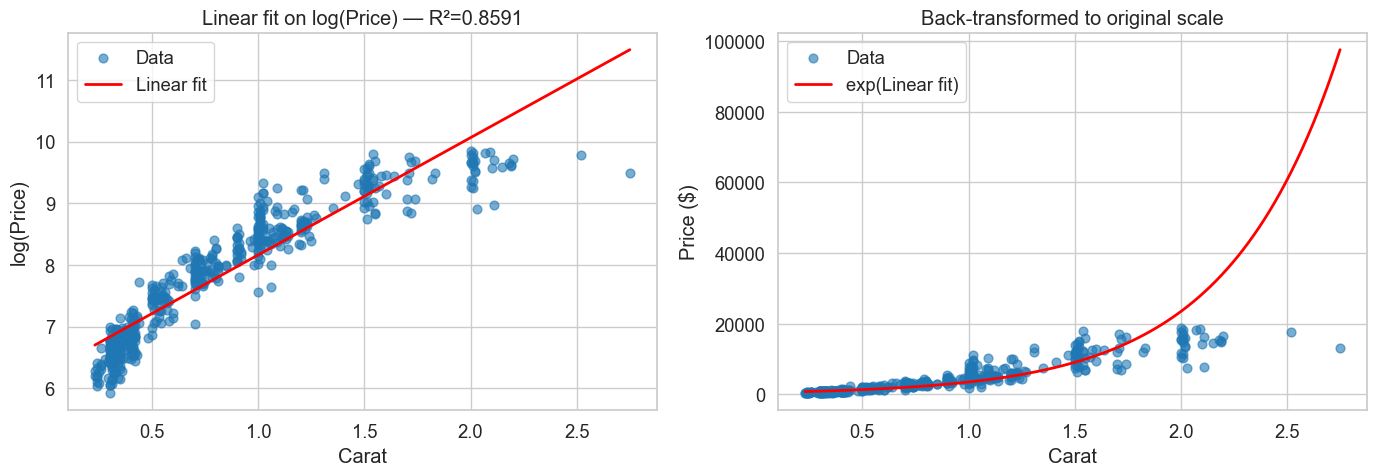

In [11]:
# Log-transform the price
dataset['log_price'] = np.log(dataset['price'])

X_carat = dataset[['carat']].values
y_log = dataset['log_price'].values

model_log = LinearRegression(fit_intercept=True)
model_log.fit(X_carat, y_log)

r2_log = r2_score(y_log, model_log.predict(X_carat))
print(f"R-squared (log-price, linear model) = {r2_log:.4f}")
print(f"\nCompare with linear model on raw price: {r2_score(y, y_pred_linear):.4f}")

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: log-transformed fit
axes[0].scatter(dataset['carat'], y_log, s=40, alpha=0.6, label='Data')
x_plot = np.linspace(dataset['carat'].min(), dataset['carat'].max(), 100)
axes[0].plot(x_plot, model_log.predict(x_plot.reshape(-1, 1)),
             'r-', linewidth=2, label='Linear fit')
axes[0].set_xlabel('Carat')
axes[0].set_ylabel('log(Price)')
axes[0].set_title(f'Linear fit on log(Price) \u2014 R\u00b2={r2_log:.4f}')
axes[0].legend()

# Right: back-transformed prediction on original scale
axes[1].scatter(dataset['carat'], y, s=40, alpha=0.6, label='Data')
y_plot_log = model_log.predict(x_plot.reshape(-1, 1))
axes[1].plot(x_plot, np.exp(y_plot_log),
             'r-', linewidth=2, label='exp(Linear fit)')
axes[1].set_xlabel('Carat')
axes[1].set_ylabel('Price ($)')
axes[1].set_title('Back-transformed to original scale')
axes[1].legend()

plt.tight_layout()
plt.show()